In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_text

In [5]:
# Load the iris dataset for building DT
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
x = iris.data[:,:2]
y = iris.target

In [13]:
pd.DataFrame(y).value_counts()

0    50
1    50
2    50
dtype: int64

In [11]:
pd.DataFrame(x).describe()

,0,1
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [14]:
# split the data into training and test for builiding DT model and for prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
# predict
y_pred_train = dt_clf.predict(x_train)
y_pred_test = dt_clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [17]:
confusion_matrix(y_test, y_pred_test)

array([[14,  1,  0],
       [ 0,  5,  6],
       [ 0,  6,  6]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.42      0.45      0.43        11
           2       0.50      0.50      0.50        12

    accuracy                           0.66        38
   macro avg       0.64      0.63      0.63        38
weighted avg       0.67      0.66      0.66        38



In [20]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9553571428571429

0.6578947368421053


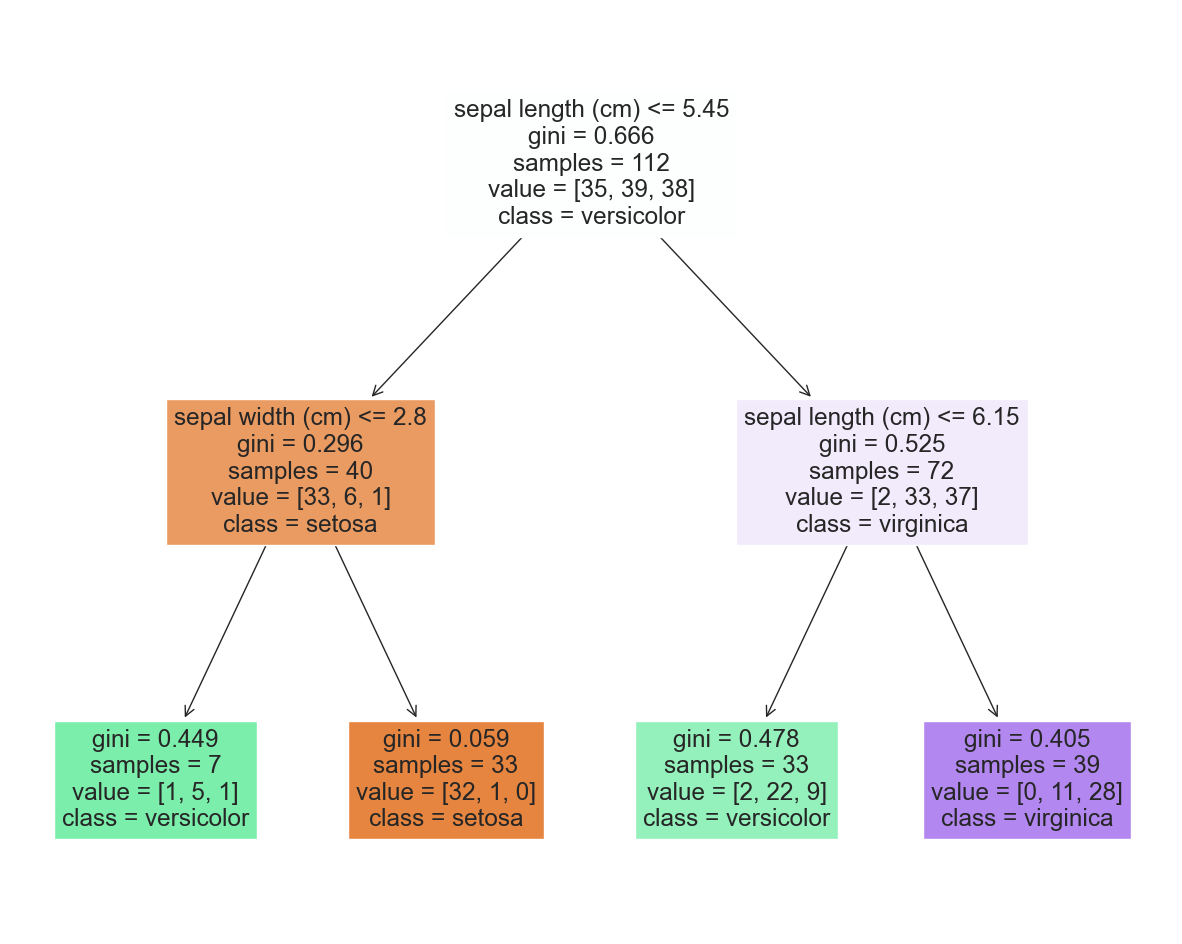

In [29]:
# plot the decisionTree Classifier
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(x_train, y_train)

y_pred_train = dt_clf.predict(x_train)
y_pred_test = dt_clf.predict(x_test)


from sklearn.tree import plot_tree
from sklearn.tree import export_text
plt.figure(figsize=(15,12))
plot_tree(dt_clf, filled=True, feature_names=iris.feature_names[:2], 
          class_names=iris.target_names)
plt.show()



In [23]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.7767857142857143

0.7631578947368421


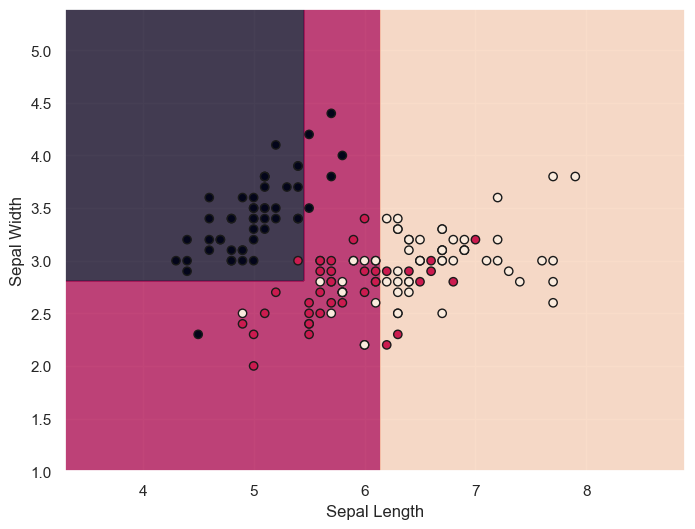

In [25]:
# Plot the decision boundary
plt.figure(figsize=(8,6))
x_min, x_max = x[:,0].min() - 1, x[:,0].max()+1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), 
                     np.arange(y_min, y_max, 0.01))
z = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,0], x[:,1], c=y, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [30]:
explain = export_text(dt_clf, feature_names=['sepal_length', 'sepal_width'])
print(explain)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- class: 2



# DecisionTree Project : 

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_text

In [32]:
df = pd.read_csv('MulticlassClassificationDataset.csv')
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Sex                  334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [34]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [35]:
# dropping non-significant vvariable
df.drop(['studyName','Sample Number','Individual ID', 'Date Egg','Comments'], axis=1, inplace=True)

In [36]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


In [37]:
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [46]:
for i in df.columns:
    print("**********************************", i ,
         "*******************************************")
    print()
    print(set(df[i].tolist()))
    print()

********************************** Species *******************************************

{'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)'}

********************************** Island *******************************************

{'Dream', 'Biscoe', 'Torgersen'}

********************************** Culmen Length (mm) *******************************************

{nan, nan, 49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 48.2, 45.0, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.0, 38.6, 38.7, 38.2, 38.8, 37.5, 39.1, 39.3, 39.2, 39.8, 39.6, 39.0, 39.7, 40.6, 40.5, 40.9, 40.8, 40.1, 41.4, 41.3, 41.6, 41.8, 41.0, 42.2, 42.3, 42.8, 42.1, 42.9, 43.2, 42.7, 43.1, 43.5, 

In [41]:
df['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [42]:
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)']=='.','190', 
                                     df['Flipper Length (mm)'])

In [44]:
df['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [45]:
df['Body Mass (g)'] = np.where(df['Body Mass (g)']=='.','3800',df['Body Mass (g)'])

In [47]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [48]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


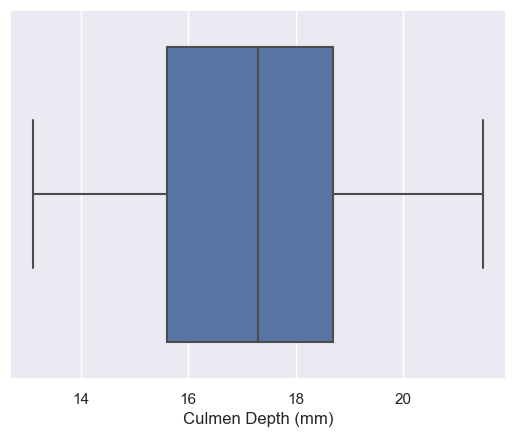

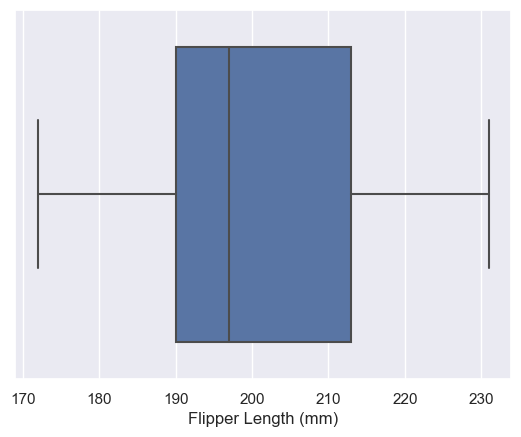

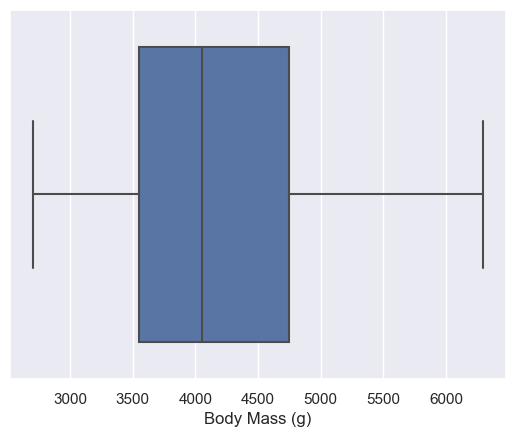

In [50]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [61]:
# Impute the missing value by using SKLEARN function

"""
from sklearn.impute import SimpleImputer

simple_impute = SimpleImputer(strategy='mean')
x[:,1:-1] = simple_impute.fit_transform(x[:,1:-1])
x
"""

"\nfrom sklearn.impute import SimpleImputer\n\nsimple_impute = SimpleImputer(strategy='mean')\nx[:,1:-1] = simple_impute.fit_transform(x[:,1:-1])\nx\n"

In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
 5   Sex                  334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


In [67]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                    10
dtype: int64

In [62]:
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

In [68]:
df['Sex'].value_counts()

MALE      169
FEMALE    165
Name: Sex, dtype: int64

In [66]:
df['Sex'] = np.where(df['Sex']=='.','MALE', df['Sex'])

In [69]:
df['Sex'] = df['Sex'].fillna('MALE')

In [70]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [72]:
# Dependent variable - only label encoding required - Species
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,39.10000,18.70000,181.000000,3800.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,190.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.900585,4201.900585,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [73]:
df['Species'].value_counts()

0    152
2    124
1     68
Name: Species, dtype: int64

In [74]:
df['Island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

In [75]:
df = pd.get_dummies(df, columns=['Island', 'Sex'])

In [76]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,0,39.10000,18.70000,181.000000,3800.000000,0,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,0,1,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,0,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


In [77]:
df = df.drop(['Island_Biscoe','Sex_FEMALE'], axis=1)

In [78]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,0,39.10000,18.70000,181.000000,3800.000000,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,1,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0


In [79]:
df.describe()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,43.921930,17.151170,200.900585,4201.900585,0.360465,0.151163,0.520349
std,0.893320,5.443643,1.969027,14.029396,799.535241,0.480835,0.358729,0.500313
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000
25%,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,0.000000,0.000000
50%,1.000000,44.250000,17.300000,197.000000,4050.000000,0.000000,0.000000,1.000000
75%,2.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,0.000000,1.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,1.000000,1.000000


Number of Male : 179
Number of Female : 165


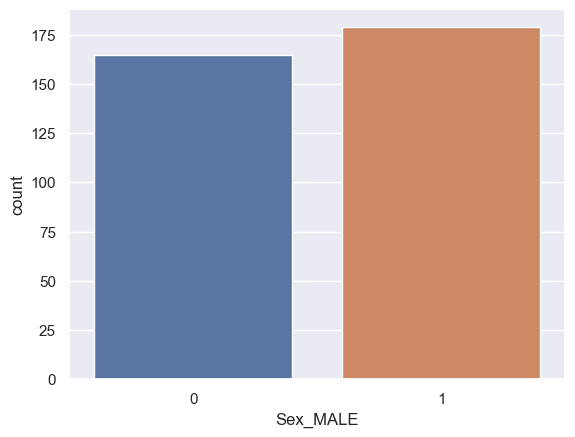

In [80]:
sns.countplot(data=df, x='Sex_MALE')
Male, Female = df['Sex_MALE'].value_counts()
print("Number of Male :", Male)
print("Number of Female :", Female)
plt.show()

Number of A : 152
Number of B : 124
Number of C: 68


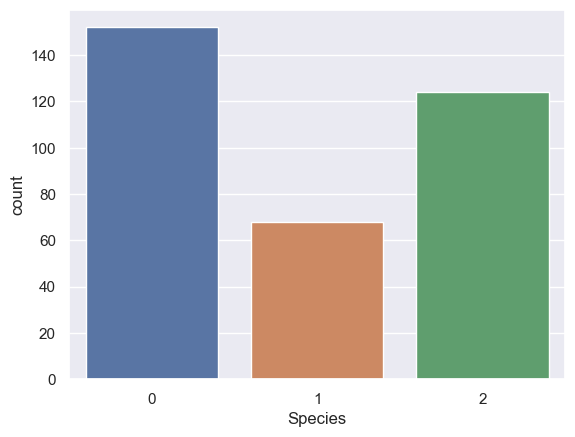

In [81]:
# imbalance check
sns.countplot(data=df, x='Species')
A, B, C = df['Species'].value_counts()
print("Number of A :", A)
print("Number of B :",B)
print("Number of C:", C)
plt.show()

In [82]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Island_Dream',
       'Island_Torgersen', 'Sex_MALE'],
      dtype='object')

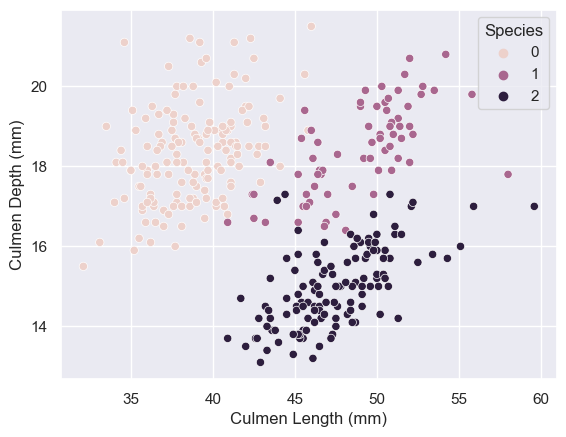

In [83]:
sns.scatterplot(x='Culmen Length (mm)', y ='Culmen Depth (mm)', data=df, hue='Species')
plt.show()

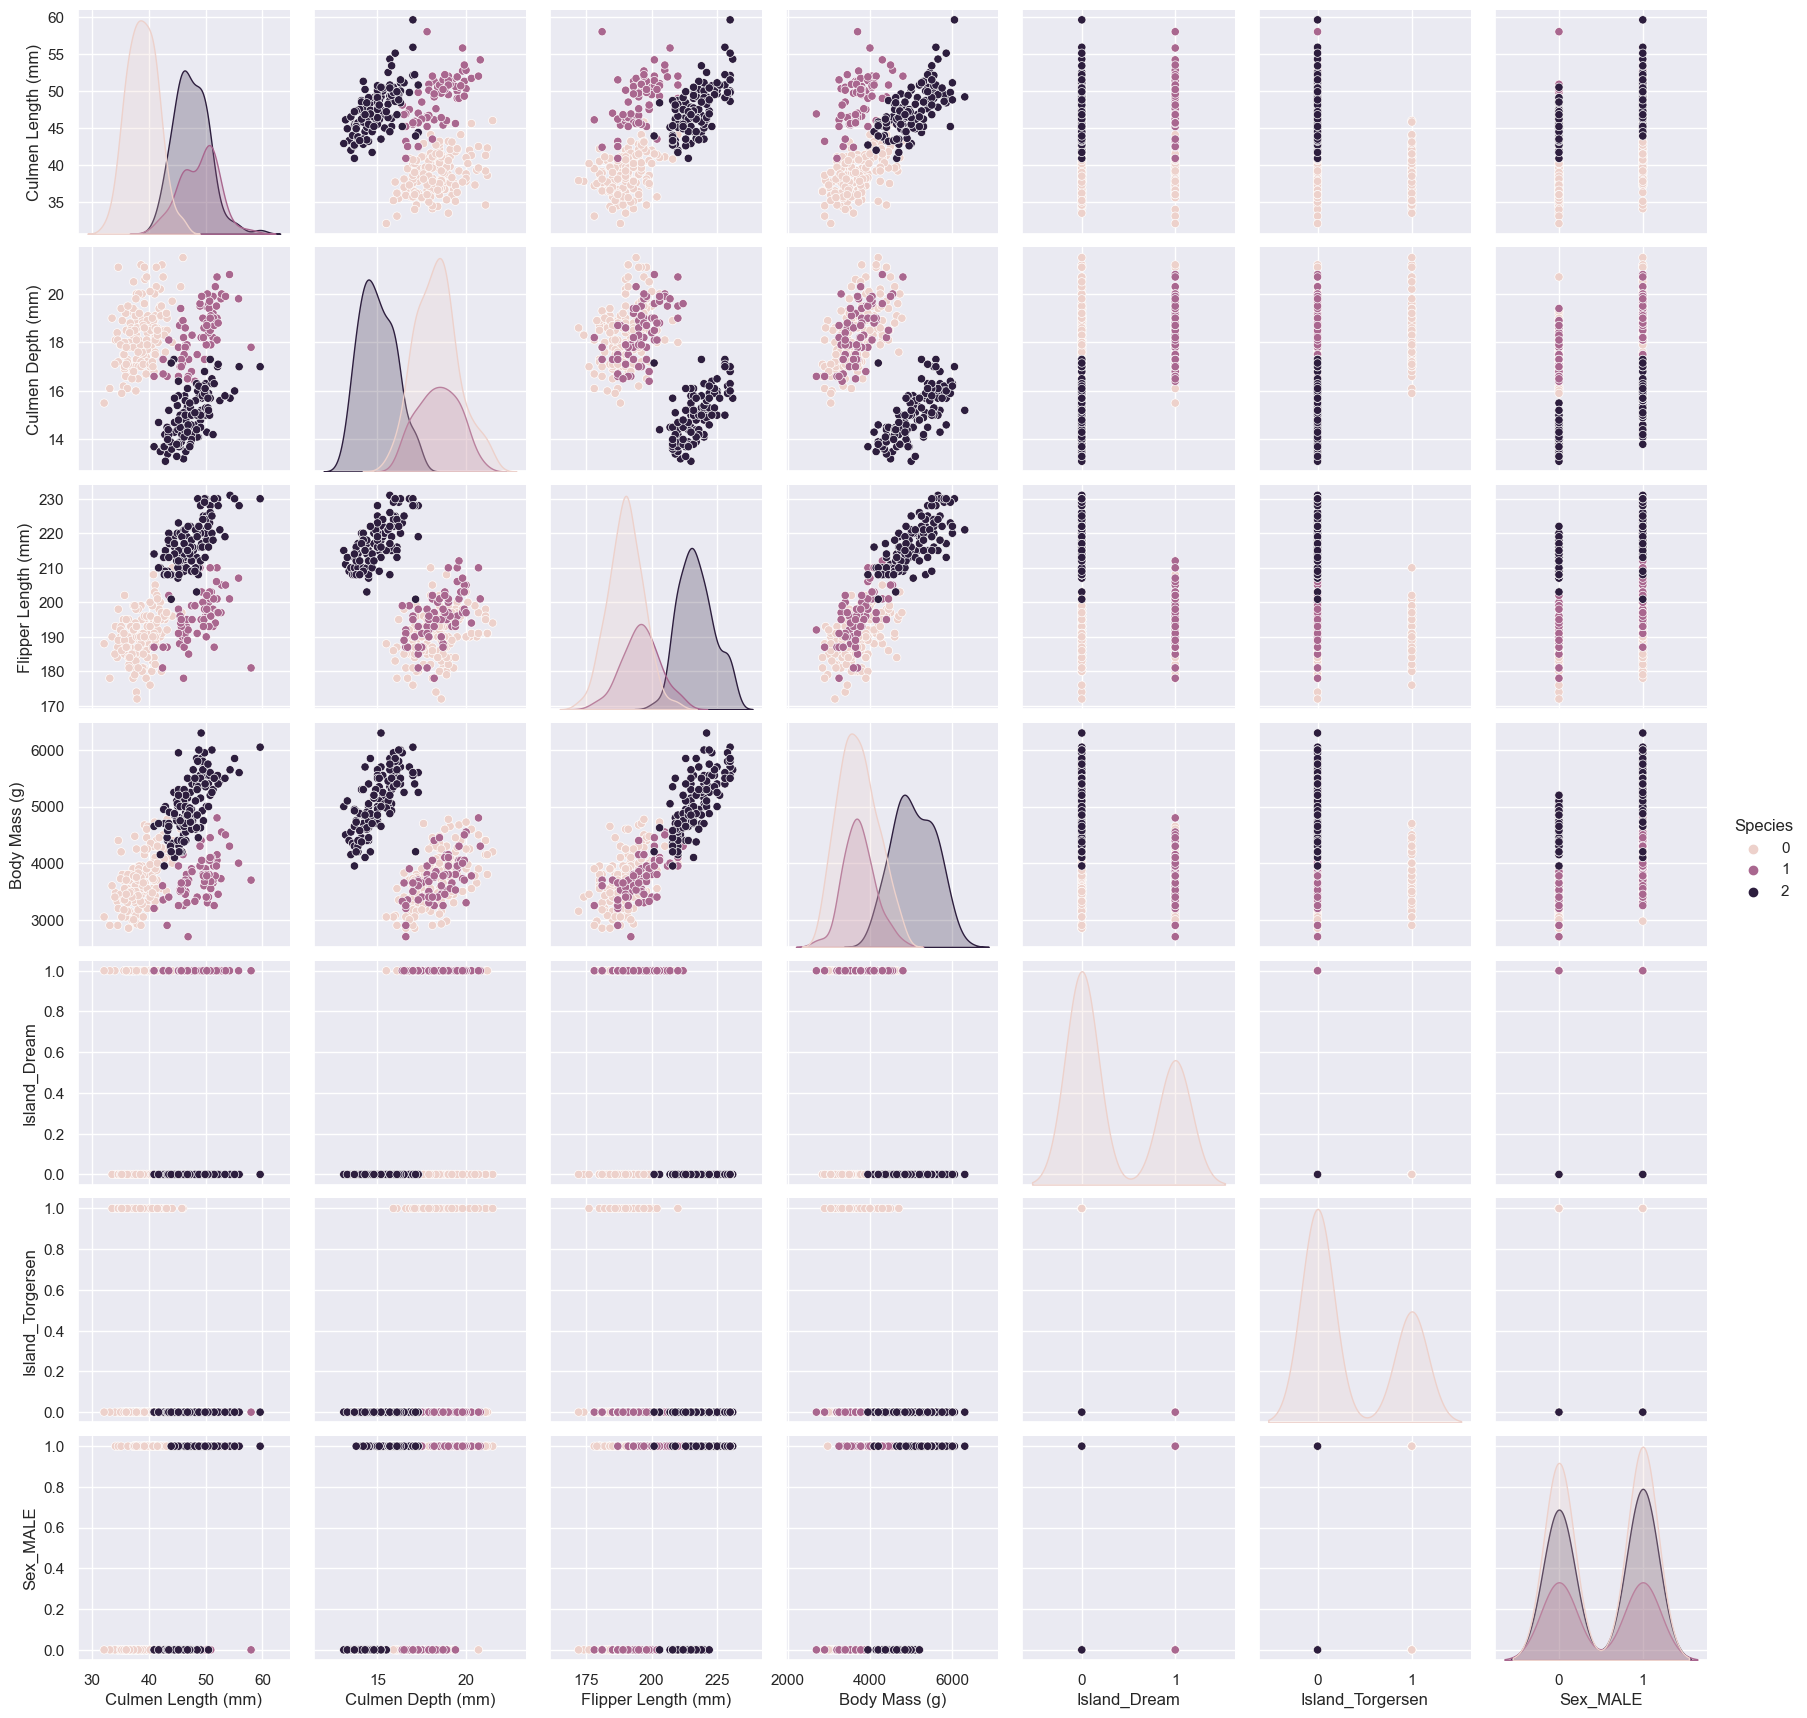

In [84]:
sns.pairplot(data=df, hue='Species')
plt.show()

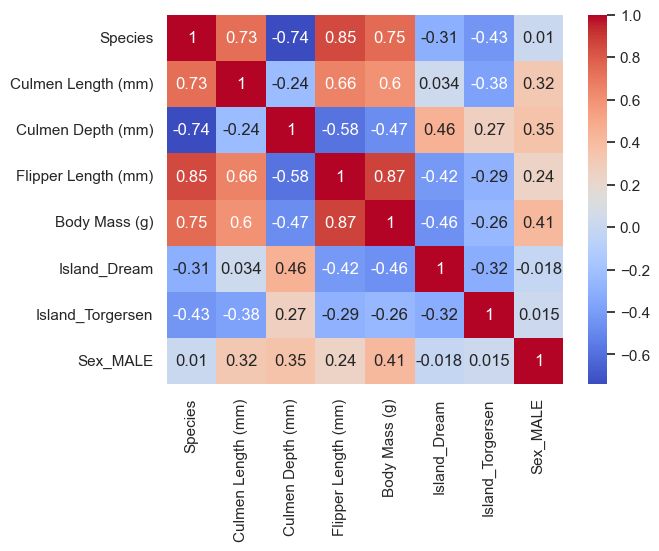

In [85]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

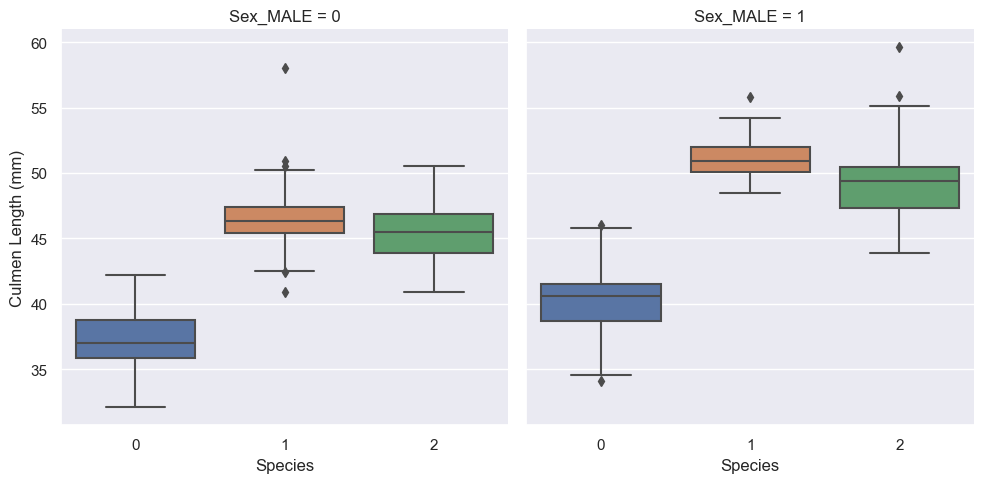

In [86]:
sns.catplot(data=df, x ='Species', y ='Culmen Length (mm)', kind='box', col = 'Sex_MALE')
plt.show()

In [ ]:
# preprocessing part and EDA
# Building Model and evaluation - tomorrow
# RandomForest Model -